In [1]:
% matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import linalg as LA
from scipy import stats as stats
import matplotlib.cm as cm
from PIL import Image
plt.style.use("ggplot")


   Unnamed: 0  eruptions  waiting
0           1      3.600       79
1           2      1.800       54
2           3      3.333       74
3           4      2.283       62
4           5      4.533       85
Index(['Unnamed: 0', 'eruptions', 'waiting'], dtype='object')
   eruptions  waiting
0      3.600       79
1      1.800       54
2      3.333       74
3      2.283       62
4      4.533       85
(272, 2)
[ 3.48778309 70.89705882]
          0         1
0  0.098499  0.597123
1 -1.481459 -1.245181
2 -0.135861  0.228663
3 -1.057503 -0.655644
4  0.917443  1.039277


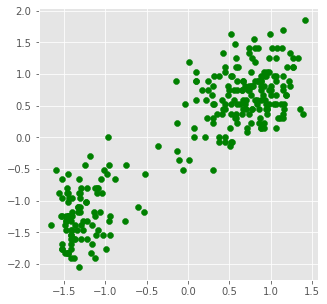

In [2]:
data = pd.read_csv("/content/drive/My Drive/ColabNotebooks/PRML/9章/faithful.csv",sep=",")
print(data.head())
print(data.columns)
data.pop('Unnamed: 0')
print(data.head())
data = data.values
print(data.shape)
data_center = np.array([data[:,0].mean(),data[:,1].mean()])
print(data_center)
center_data = data - data_center
plt.figure(figsize=(5,5))
data = center_data / np.array([data[:,0].std(), data[:,1].std()])
data = pd.DataFrame(data)
print(data.head())
plt.scatter(data[0], data[1], c="g")

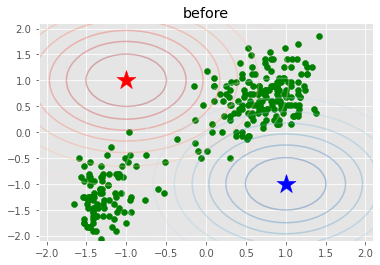

In [3]:
K = 2
N = len(data)
mu1 = np.array([-1,1])
mu2 = np.array([1,-1])
sigma1 = sigma2 = np.eye(2)
pi = np.array([0.5, 0.5])
r = np.zeros([N,K]) # (N, K) の負担率

def multi_gauss(x, y, mu, sigma):
  return stats.multivariate_normal(mean=mu, cov=sigma).pdf(np.array([x,y]))

X,Y = np.meshgrid(np.linspace(-2.1,2.1), np.linspace(-2.1,2.1))
Z1 = np.vectorize(lambda x,y: multi_gauss(x,y,mu1,sigma1))(X,Y)
Z2 = np.vectorize(lambda x,y: multi_gauss(x,y,mu2,sigma2))(X,Y)

plt.contour(X,Y,Z1, cmap=cm.Reds, alpha=0.3)
plt.contour(X,Y,Z2, cmap=cm.Blues, alpha=0.3)

plt.scatter(mu1[0],mu1[1], marker="*", s=400, c="r")
plt.scatter(mu2[0],mu2[1], marker="*", s=400, c="b")
plt.scatter(data[0], data[1], c="g")
plt.xlim(-2.1,2.1)
plt.ylim(-2.1,2.1)
plt.title("before")
plt.show()

In [9]:
#print((data.values).shape)
#data = data.values
print(data[1])

[-1.48145856 -1.24518118]


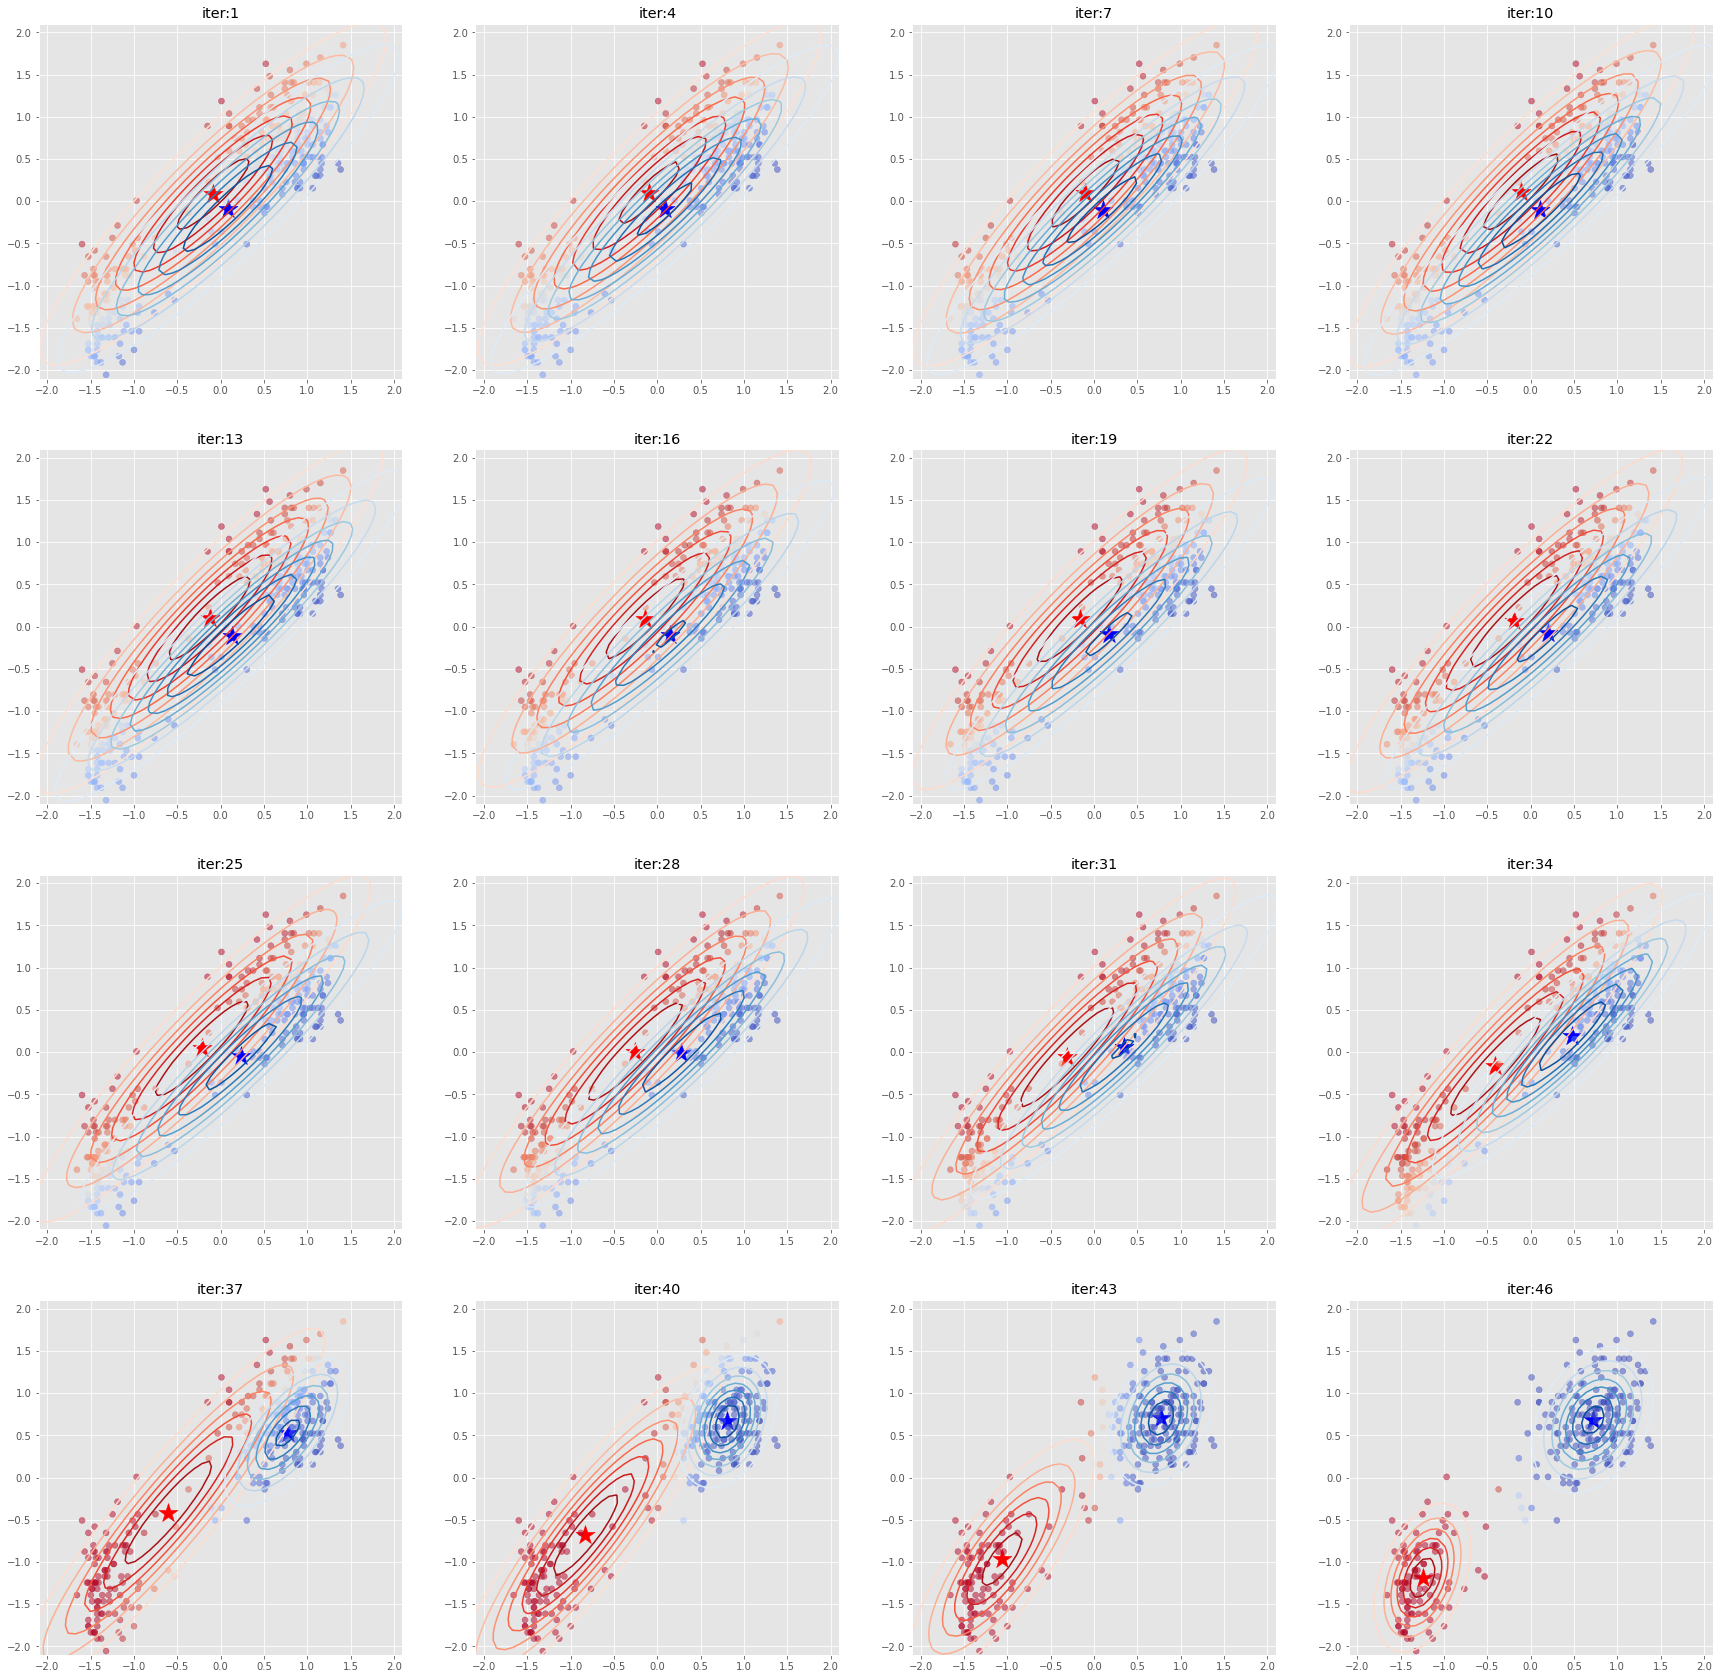

In [7]:
#data = data.values
fig, axes = plt.subplots(4,4,figsize=(30,30))
for i in range(4):
  for j in range(4):
    for k in range(3):
      step = i*4*3 + j*3 + k + 1

      # Expect Step
      g1 =  np.vectorize(lambda x,y:  pi[0] *multi_gauss(x,y,mu1,sigma1))(data[:,0],data[:,1]) # (N, 2)
      g2 =  np.vectorize(lambda x,y: pi[1] * multi_gauss(x,y,mu2,sigma2))(data[:,0],data[:,1]) # (N, 2)
      r[:,0] = g1 / (g1+g2) # (N,2,2)
      r[:,1] = g2 / (g1+g2)

      # Max Step
      N1 = r[:,0].sum(axis=0) # sum(N,2) -> (2)
      N2 = r[:,1].sum(axis=0)
      mu1 = r.T.dot(data)[0] / N1 # r.T.dot(data): (2,2,N)@(N,2) -> (2,2,2) -> (2,2)
      mu2 = r.T.dot(data)[1] / N2

      sig1 = sum([ r[n,0] * np.outer(data[n,:] - mu1, data[n,:] - mu1) for n in range(N)])
      sig2 = sum([ r[n,1] * np.outer(data[n,:] - mu2, data[n,:] - mu2) for n in range(N)])
      sigma1 = sig1 / N1
      sigma2 = sig2 / N2
      pi[0] = N1/N
      pi[1] = N2/N

      if (step - 1) % 3 == 0:
        X, Y = np.meshgrid(np.linspace(-2.1,2.1), np.linspace(-2.1,2.1))
        Z1 = np.vectorize(lambda x,y: multi_gauss(x,y,mu1,sigma1))(X,Y)
        Z2 = np.vectorize(lambda x,y: multi_gauss(x,y,mu2,sigma2))(X,Y)
        
        axes[i,j].contour(X,Y,Z1,cmap=cm.Reds)
        axes[i,j].contour(X,Y,Z2,cmap=cm.Blues)

        axes[i,j].scatter(mu1[0],mu1[1], marker="*", s=400, c="r")
        axes[i,j].scatter(mu2[0],mu2[1], marker="*", s=400, c="b")
        axes[i,j].scatter(data[:,0], data[:,1], c=r[:,0], cmap=cm.coolwarm, alpha=0.5)
        axes[i,j].set_xlim(-2.1,2.1)
        axes[i,j].set_ylim(-2.1,2.1)
        axes[i,j].set_title(f"iter:{step}")